In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import json

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [46]:
with open('data.json', 'r', encoding='utf-8') as f:
    region_data = json.load(f)

# 데이터 확인
type(region_data)
region_data.keys()
region_data.items()
region_data['서울']['강남구'].keys()

dict_keys(['population', 'crime', 'violence', 'burgerking', 'lotteria', 'mcdonalds', 'kfc'])

In [47]:
# 데이터프레임 변환
dataset = []

for sido, sigungu_dict in region_data.items():
    for sigungu, cols in sigungu_dict.items():
        parted_data = {
            'sido': sido,
            'sigungu': sigungu,
            **cols                                  # data unpacking
        }
        dataset.append(parted_data)

df = pd.DataFrame(dataset)

# 원하는 컬럼 순서로 맞추기
columns = ['sido', 'sigungu', 'population', 'crime', 'violence', 'kfc', 'burgerking', 'lotteria', 'mcdonalds']
df = df[columns]
df.head()

,sido,sigungu,population,crime,violence,kfc,burgerking,lotteria,mcdonalds
0,서울,강남구,557345,677,3335,8,9,7,9
1,서울,강동구,476942,178,1519,3,4,8,3
2,서울,강북구,283597,151,1169,2,3,5,4
3,서울,강서구,556171,288,2049,4,7,12,4
4,서울,관악구,477812,353,2167,3,6,9,1


In [48]:
df['burger_index'] = ((df['kfc'] + df['burgerking'] + df['mcdonalds']) / df['lotteria'])
df['crime_rate'] = ((df['crime'] + df['violence']) / df['population'] * 100000)

# 변수명 burger_index, crime_rate 어떤지 통일 필요
# descibe()로 봤을 때 결측치 다량, 일단 0으로 통일하는 방향으로 진행
# why? 우리는 해당 지역의 버거지수가 필요하고, 범죄율 또한 필요함. 평균값이나 대체값으로 없는 데이터를 있다고 할 수는 없음.
# 하지만,, 일단 결측값이 많아서 그래프 모의 구현 자체는 결측값 제외하고 하겠음
df.head(20)

,sido,sigungu,population,crime,violence,kfc,burgerking,lotteria,mcdonalds,burger_index,crime_rate
0,서울,강남구,557345,677,3335,8,9,7,9,3.714286,719.841391
1,서울,강동구,476942,178,1519,3,4,8,3,1.250000,355.808463
2,서울,강북구,283597,151,1169,2,3,5,4,1.800000,465.449211
3,서울,강서구,556171,288,2049,4,7,12,4,1.250000,420.194509
4,서울,관악구,477812,353,2167,3,6,9,1,1.111111,527.404084
5,서울,광진구,331963,252,1303,3,6,7,2,1.571429,468.425698
6,서울,구로구,388169,199,1616,1,4,6,3,1.333333,467.579843
7,서울,금천구,225159,141,992,2,3,5,4,1.800000,503.199961
8,서울,노원구,491247,162,1434,3,4,7,6,1.857143,324.887480
9,서울,도봉구,303228,86,858,3,3,4,1,1.750000,311.316897


In [49]:
# 결측값 확인(사유: 지역명 및 인구수의 오류로 인한 버거지수 및 범죄율 계산에서 결측값 발생)
print(df.isna().sum())
df = df.dropna(how='any')

sido             0
sigungu          0
population       0
crime            0
violence         0
kfc              0
burgerking       0
lotteria         0
mcdonalds        0
burger_index    11
crime_rate      57
dtype: int64


In [50]:
# 결측값 제거 후 인덱스 리셋
df.reset_index(drop=True)

,sido,sigungu,population,crime,violence,kfc,burgerking,lotteria,mcdonalds,burger_index,crime_rate
0,서울,강남구,557345,677,3335,8,9,7,9,3.714286,719.841391
1,서울,강동구,476942,178,1519,3,4,8,3,1.250000,355.808463
2,서울,강북구,283597,151,1169,2,3,5,4,1.800000,465.449211
3,서울,강서구,556171,288,2049,4,7,12,4,1.250000,420.194509
4,서울,관악구,477812,353,2167,3,6,9,1,1.111111,527.404084
...,...,...,...,...,...,...,...,...,...,...,...
213,충북,단양군,27352,0,0,0,0,1,0,0.000000,0.000000
214,충북,보은군,30527,0,0,0,0,1,0,0.000000,0.000000
215,충북,옥천군,48204,0,0,0,0,1,0,0.000000,0.000000
216,충북,증평군,37171,0,0,0,0,1,0,0.000000,0.000000


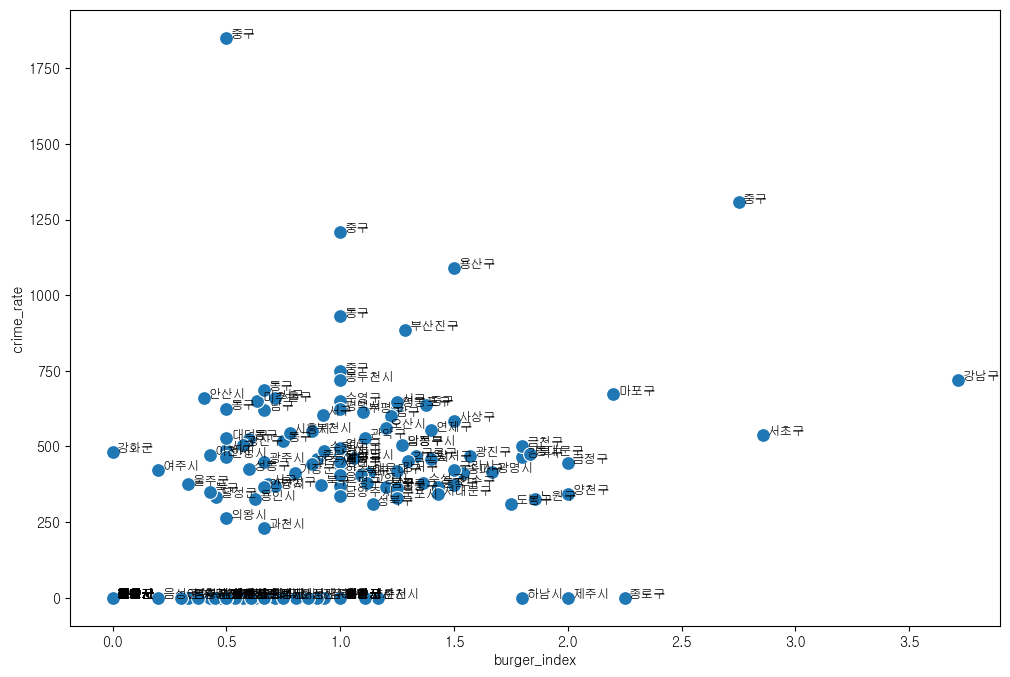

In [51]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='burger_index', y='crime_rate', data=df, s=100)

for sido in range(len(df)):
    plt.text(df['burger_index'].iloc[sido]+0.02, df['crime_rate'].iloc[sido], df['sigungu'].iloc[sido], fontsize=9)

plt.show()
# 결측치 부산 중구 < 빼거나 인구수/범죄율 맞는지 재확인 필요

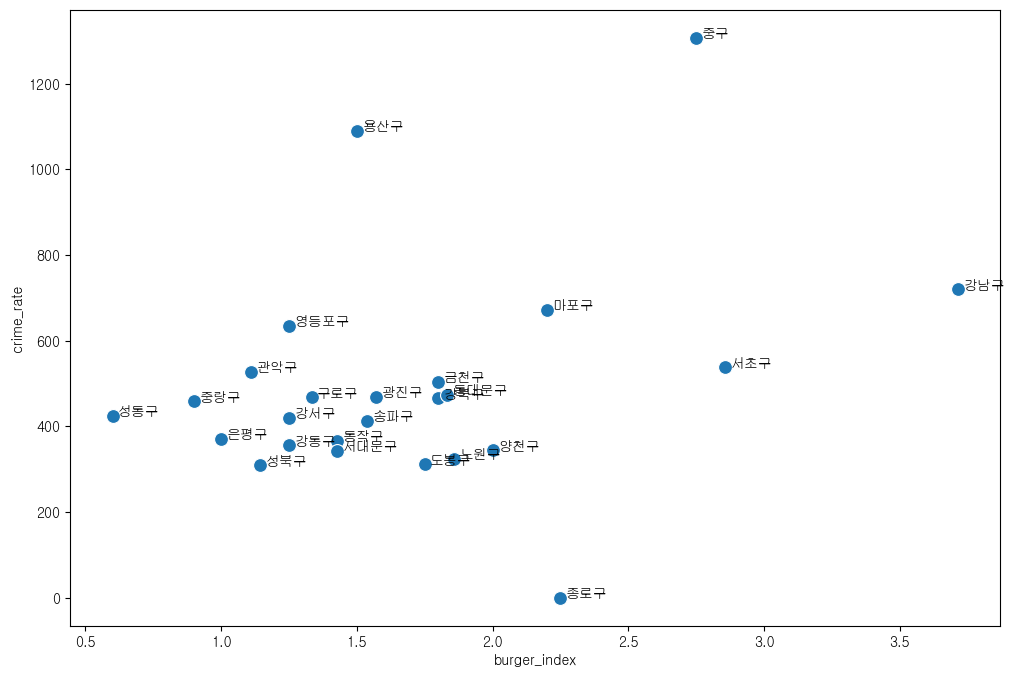

In [52]:
plt.figure(figsize=(12, 8))
seoul_df = df[df['sido'] == '서울']
sns.scatterplot(x='burger_index', y='crime_rate', data=seoul_df, s=100)

for sigungu in range(len(seoul_df)):
    plt.text(seoul_df['burger_index'].iloc[sigungu]+0.02, seoul_df['crime_rate'].iloc[sigungu], seoul_df['sigungu'].iloc[sigungu], fontsize=10)

plt.show()
# 서울만 따로

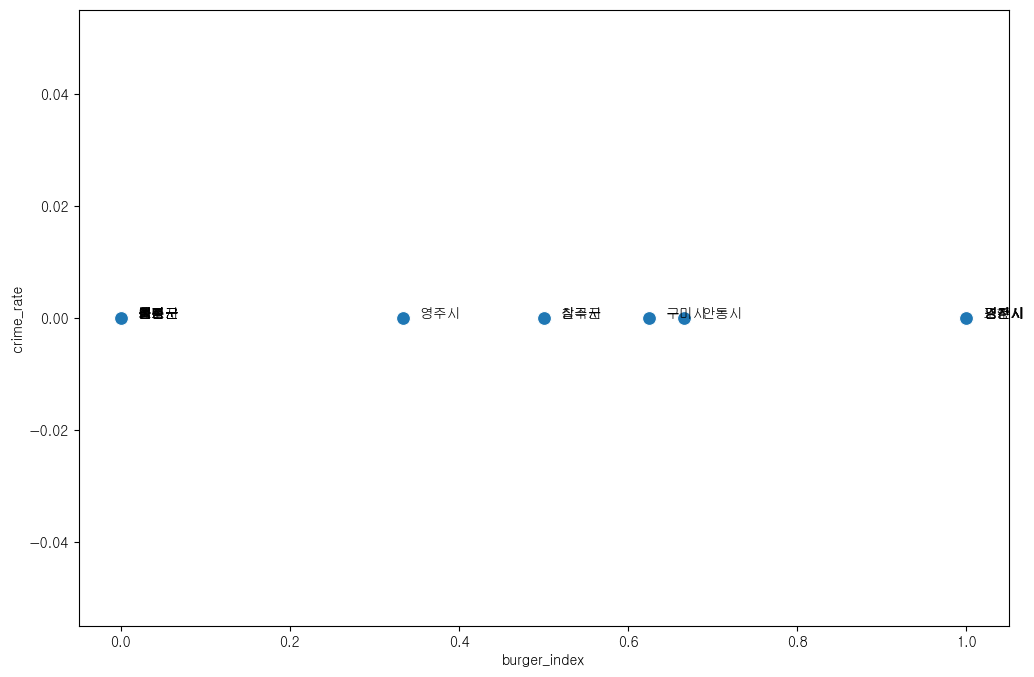

In [53]:
plt.figure(figsize=(12, 8))
gwangju_df = df[df['sido'] == '경북']
sns.scatterplot(x='burger_index', y='crime_rate', data=gwangju_df, s=100)

for sigungu in range(len(gwangju_df)):
    plt.text(gwangju_df['burger_index'].iloc[sigungu]+0.02, gwangju_df['crime_rate'].iloc[sigungu], gwangju_df['sigungu'].iloc[sigungu], fontsize=10)

plt.show()
# 서울만 따로

In [54]:
print(df[['burger_index', 'crime_rate']].corr())

              burger_index  crime_rate
burger_index      1.000000    0.535789
crime_rate        0.535789    1.000000


In [55]:
# 범죄율이 높음 = 4등급 / 낮음 = 1등급
def crime_grade(score):
    if score > 573.6:
        return '4등급'
    if score > 460.8:
        return '3등급'
    if score > 375.3:
        return '2등급'
    else:
        return '1등급'

df['crime_gd'] = df['crime_rate'].apply(crime_grade)
df

,sido,sigungu,population,crime,violence,kfc,burgerking,lotteria,mcdonalds,burger_index,crime_rate,crime_gd
0,서울,강남구,557345,677,3335,8,9,7,9,3.714286,719.841391,4등급
1,서울,강동구,476942,178,1519,3,4,8,3,1.250000,355.808463,1등급
2,서울,강북구,283597,151,1169,2,3,5,4,1.800000,465.449211,3등급
3,서울,강서구,556171,288,2049,4,7,12,4,1.250000,420.194509,2등급
4,서울,관악구,477812,353,2167,3,6,9,1,1.111111,527.404084,3등급
...,...,...,...,...,...,...,...,...,...,...,...,...
280,충북,단양군,27352,0,0,0,0,1,0,0.000000,0.000000,1등급
281,충북,보은군,30527,0,0,0,0,1,0,0.000000,0.000000,1등급
282,충북,옥천군,48204,0,0,0,0,1,0,0.000000,0.000000,1등급
283,충북,증평군,37171,0,0,0,0,1,0,0.000000,0.000000,1등급


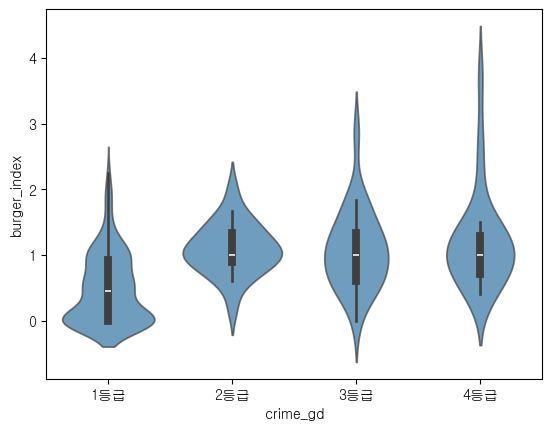

In [56]:
sns.violinplot(x='crime_gd', y='burger_index', data=df, order=['1등급', '2등급', '3등급', '4등급'], alpha= 0.7)
plt.show()

In [57]:
df.loc[:, 'crime_rate'] = df['crime_rate'].round().astype(int)
df.loc[:, 'burger_index'] = df['burger_index'].round().astype(int)

df.describe()

,population,crime,violence,kfc,burgerking,lotteria,mcdonalds,burger_index,crime_rate
count,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,2.316106e+05,74.243119,668.876147,0.857798,2.500000,5.862385,1.830275,0.665138,228.555046
std,2.249479e+05,115.246042,971.041988,1.411917,2.890075,5.838010,2.258339,0.707286,298.561079
min,9.099000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.497800e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.589135e+05,0.000000,0.000000,0.000000,1.500000,4.000000,1.000000,1.000000,0.000000
75%,3.518452e+05,117.750000,1152.750000,1.000000,4.000000,8.000000,3.000000,1.000000,449.750000
max,1.193005e+06,677.000000,5230.000000,8.000000,17.000000,31.000000,12.000000,4.000000,1852.000000


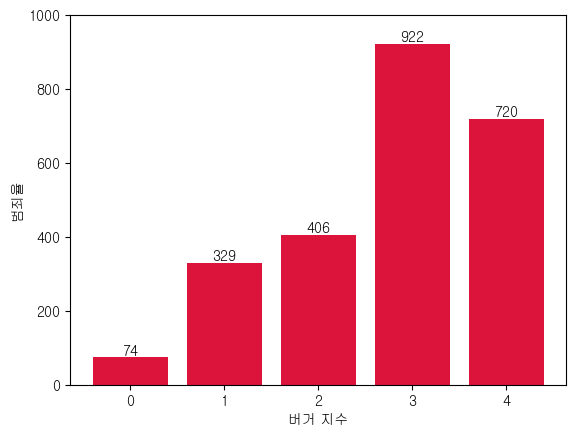

In [58]:
# 버거지수를 기준으로 범죄율 평균을 보는 그래프
crime_rate_grp = df.groupby('burger_index')['crime_rate'].mean().reset_index()

graph = plt.bar(crime_rate_grp['burger_index'], crime_rate_grp['crime_rate'], color = 'crimson')
plt.ylim(0,1000)

# 데이터 값 표시
for rate_value in graph:
    height = rate_value.get_height()
    plt.text(rate_value.get_x() + rate_value.get_width()/2.0, height, '%i' % height, ha='center', va='bottom', size=10)

plt.ylabel('범죄율')
plt.xlabel('버거 지수')
plt.show()